# <b>Question 6</b>

In [1]:
import cv2
import json as js
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import time
import pickle
import sortedcontainers
import copy
%matplotlib inline

In [2]:
arr = np.array(js.loads(np.load("../images/shinchan.pkl",allow_pickle=True)))
print(arr.shape)

(648, 1152, 4)


In [3]:
img = np.zeros((arr.shape[0],arr.shape[1],arr.shape[2]-1), dtype = int)
img[:,:,:3] = arr[:,:,:3]

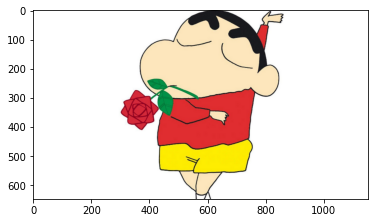

In [4]:
plt.imshow(img,cmap='gray')

In [5]:
print(img.shape)
r = img.shape[0]
c = img.shape[1]
totalSize = (648*1152*3)/2**20
print("total size:",totalSize,"mb")

(648, 1152, 3)
total size: 2.1357421875 mb


## <b>Part 6.1</b>

### Part 6.1a

In [6]:
#Basic data-structure referred from python's standard DSA template 
class node:
    def __init__(self,frequency,bit = None, left = None, right = None, huffD = None):
        self.bit = bit
        self.frequency = frequency
        self.left = left
        self.right = right
        self.huffD = huffD
def frequencyObtain(node):
    frequencyVal = node.frequency
    return frequencyVal

In [7]:
dictionary = {}

In [8]:
for i in range(r):
    for j in range(c):
    #8 bits needed for each pixel's each channel
        #Channel-Red
        dicR = int(img[i,j,0])
        #Channel-Green
        dicG = int(img[i,j,1]<<8)
        #Channel-Blue
        dicB = int(img[i,j,2]<<16)
        #Is it already present in dictionary?
        #If yes - add them their frequency
        if (int(dicR+dicG+dicB)) in dictionary:
            dictionary[dicR+dicG+dicB] = dictionary[dicR+dicG+dicB] + 1
        else:
        #If no- add them to dictionary with initial value
            dictionary[dicR+dicG+dicB] = 1

In [9]:
print(dictionary)

{16777215: 518378, 16776959: 172, 16711167: 53, 16711166: 137, 16645373: 108, 16513786: 32, 16448250: 263, 16382457: 183, 16514043: 349, 16645884: 41, 16645627: 39, 16448505: 15, 16777213: 61, 16711421: 136, 16514042: 26, 16316663: 7, 16382455: 8, 16184306: 2, 15263203: 1, 14012880: 1, 12236469: 1, 10526107: 1, 9473419: 1, 8091766: 1, 5788755: 1, 4801860: 1, 4801861: 2, 4209724: 1, 3420209: 1, 3222830: 1, 3354415: 2, 2762278: 1, 1906713: 262, 1972506: 390, 1775384: 24, 1972762: 250, 2038811: 17, 1907224: 504, 2499105: 2, 3354414: 1, 3354670: 2, 3486000: 1, 3551793: 1, 4341565: 2, 4802116: 1, 4736324: 1, 5459792: 1, 7104360: 1, 6512223: 1, 8288890: 1, 8946564: 1, 9670544: 1, 10723232: 1, 11973042: 1, 13223366: 1, 14014166: 1, 15264746: 2, 15593454: 1, 15922162: 2, 15922420: 3, 15988213: 3, 16185591: 4, 16251385: 22, 16448764: 37, 16316921: 25, 16316664: 103, 16250871: 68, 16579836: 460, 16645629: 1170, 16711422: 2084, 16711678: 264, 16646140: 14, 16646139: 10, 16711675: 6, 16711419: 12,

In [10]:
freqObtainFunction = sortedcontainers.SortedKeyList(key=frequencyObtain)

In [11]:
print(freqObtainFunction)

SortedKeyList([], key=<function frequencyObtain at 0x7f8aba4a7158>)


In [12]:
for code,codeVal in dictionary.items():
    print(codeVal,code)
    freqObtainFunction.add(node(codeVal,code))

518378 16777215
172 16776959
53 16711167
137 16711166
108 16645373
32 16513786
263 16448250
183 16382457
349 16514043
41 16645884
39 16645627
15 16448505
61 16777213
136 16711421
26 16514042
7 16316663
8 16382455
2 16184306
1 15263203
1 14012880
1 12236469
1 10526107
1 9473419
1 8091766
1 5788755
1 4801860
2 4801861
1 4209724
1 3420209
1 3222830
2 3354415
1 2762278
262 1906713
390 1972506
24 1775384
250 1972762
17 2038811
504 1907224
2 2499105
1 3354414
2 3354670
1 3486000
1 3551793
2 4341565
1 4802116
1 4736324
1 5459792
1 7104360
1 6512223
1 8288890
1 8946564
1 9670544
1 10723232
1 11973042
1 13223366
1 14014166
2 15264746
1 15593454
2 15922162
3 15922420
3 15988213
4 16185591
22 16251385
37 16448764
25 16316921
103 16316664
68 16250871
460 16579836
1170 16645629
2084 16711422
264 16711678
14 16646140
10 16646139
6 16711675
12 16711419
28 16645626
3 16382966
5 16317174
6 16317431
6 16383223
3 16317432
8 16185848
2 15988470
3 15856627
31 16382714
178 16645886
192 16711423
98 16645628


In [13]:
print(len(freqObtainFunction))

40885


In [14]:
start = freqObtainFunction[0]
ref = freqObtainFunction[0]
print(start)

### Part 6.1b

In [15]:
while len(freqObtainFunction) != 1:
    #Tree 
    leftNode = freqObtainFunction[0]
    rightNode = freqObtainFunction[1]
    mainNode = node(leftNode.frequency+rightNode.frequency,0,leftNode,rightNode)
    freqObtainFunction[1].huffD = 1
    freqObtainFunction[0].huffD = 0
    freqObtainFunction.remove(leftNode)
    freqObtainFunction.remove(rightNode)
    freqObtainFunction.add(mainNode)

In [23]:
#Print Huffman Tree
#Root Node
dictionary1 = {}
def printHuff(node, finalString=''):
    #Starter
    String = finalString
    if node.huffD!=None:
        String = String + str(node.huffD) 
    if(not node.left and not node.right):
        print(f"{node.bit} ____ {String}")
        dictionary1[node.bit] = String
    if node.left:
        printHuff(node.left,String)
    if node.right:
        printHuff(node.right,String)

In [24]:
printHuff(freqObtainFunction[0],'')

1775897 ____ 00000000000000
12707320 ____ 00000000000001
12641784 ____ 00000000000010
12575485 ____ 00000000000011
12641021 ____ 00000000000100
3222750 ____ 00000000000101
3222241 ____ 00000000000110
3026652 ____ 00000000000111
16513788 ____ 00000000001000
3090915 ____ 00000000001001
3027158 ____ 00000000001010
16579324 ____ 00000000001011
3222240 ____ 00000000001100
4755203 ____ 00000000001101
3942868 ____ 00000000001110
3812310 ____ 00000000001111
3223003 ____ 00000000010000
4008658 ____ 00000000010001
3680725 ____ 00000000010010
61177 ____ 00000000010011
61176 ____ 00000000010100
387837 ____ 00000000010101
125439 ____ 00000000010110
256510 ____ 00000000010111
2104349 ____ 000000000110000
16185592 ____ 000000000110001
1775896 ____ 000000000110010
1973275 ____ 000000000110011
1775640 ____ 000000000110100
1972251 ____ 000000000110101
16317437 ____ 000000000110110
16513785 ____ 000000000110111
16580346 ____ 000000000111000
1775895 ____ 000000000111001
12642044 ____ 000000000111010
21043

In [25]:
dictionary1

{1775897: '00000000000000',
 12707320: '00000000000001',
 12641784: '00000000000010',
 12575485: '00000000000011',
 12641021: '00000000000100',
 3222750: '00000000000101',
 3222241: '00000000000110',
 3026652: '00000000000111',
 16513788: '00000000001000',
 3090915: '00000000001001',
 3027158: '00000000001010',
 16579324: '00000000001011',
 3222240: '00000000001100',
 4755203: '00000000001101',
 3942868: '00000000001110',
 3812310: '00000000001111',
 3223003: '00000000010000',
 4008658: '00000000010001',
 3680725: '00000000010010',
 61177: '00000000010011',
 61176: '00000000010100',
 387837: '00000000010101',
 125439: '00000000010110',
 256510: '00000000010111',
 2104349: '000000000110000',
 16185592: '000000000110001',
 1775896: '000000000110010',
 1973275: '000000000110011',
 1775640: '000000000110100',
 1972251: '000000000110101',
 16317437: '000000000110110',
 16513785: '000000000110111',
 16580346: '000000000111000',
 1775895: '000000000111001',
 12642044: '000000000111010',
 2104

In [26]:
cImg = ''
dImg = []

In [27]:
for i in range(r):
    for j in range(c):
    #8 bits needed for each pixel's each channel
        #Channel-Red
        dicR = int(img[i,j,0])
        #Channel-Green
        dicG = int(img[i,j,1]<<8)
        #Channel-Blue
        dicB = int(img[i,j,2]<<16)
        #Is it already present in dictionary? Yes will be
        cImg += dictionary1[int(dicR+dicG+dicB)]
print(cImg)

1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111000100000100010100011110001010001111000101000111100010100011110001010001111000101000111100010100011110001010001111001111110101000101001100101100011010110011111010010001011000001111101001000100001100010110000000100001100010000110111110100100010000110000110100100000011010010000000110010110110000101100100110000111000011111100000001000111101100010110010001010001011001000101001100100011011100010000000111011110110101100000110110

In [28]:
with open("compressed.bin","wb") as file:
    pickle.dump(cImg,file)

In [29]:
print("Original file size is ",os.path.getsize("../images/shinchan.pkl")/1e6,"mb")
print("Compressed file size is ",os.path.getsize("./compressed.bin")/1e6,"mb")

Original file size is  16.16111 mb
Compressed file size is  2.68988 mb


In [30]:
#Length of compressed image
lC = len(cImg)
print(lC)

2689870


In [31]:
freqObtainFunction[0].right.huffD

1

In [32]:
#Obtain back Img from cImg and assign to dImg
it = 0
dImg= []
st = freqObtainFunction[0]
stVal = freqObtainFunction[0]
while(it<len(cImg)):
        charVal = int(cImg[it])
        if((not (st.left and (st.left.huffD == charVal))) and (not (st.right and (st.right.huffD == charVal)))):
            dImg.append(st.bit)
            st = stVal
        elif (st.left and (st.left.huffD == charVal)):
            st = st.left
            it+=1
        elif (st.right and (st.right.huffD == charVal)):
            st = st.right
            it+=1
dImg.append(start.bit)    
dImg = np.array(dImg)

In [33]:
dImg = np.reshape(dImg,(img.shape[0],img.shape[1]))

In [34]:
imgD = np.zeros_like(img)

In [35]:
for i in range(r):
    for j in range(c):
        imgD[i,j,2] = (dImg[i,j]>>16)
        imgD[i,j,1] = (dImg[i,j]>>8) - (imgD[i,j,2]<<8)
        imgD[i,j,0] = dImg[i,j] - ((dImg[i,j]>>8) - (imgD[i,j,2]<<8)<<8) - (imgD[i,j,2]<<16)
        

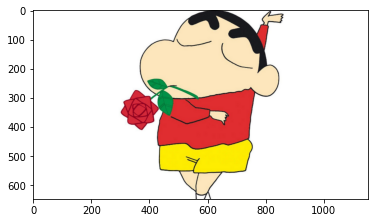

In [36]:
plt.imshow(imgD)